# module 1:  convert_xml_to_DataFrame and EDA

In [23]:
import xml.etree.ElementTree as ET
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### 1. Loading the class

In [25]:
#https://stackabuse.com/reading-and-writing-xml-files-in-python-with-pandas/
class convert_xml_to_DataFrame :

  def xml_to_df (self , root):
        data = []
        xml_col_val= dict()

        #target_words = []
        for child in root:
            xml_col_val['id'] = child.attrib.get('id')        # retrieving the id from data
            text = child.find('text').text.lower()            # retriving the text review
            xml_col_val['text'] = text                        # saved text in dict
            for aspectTerms in child.iter('aspectTerms'):     
                #print(aspectTerms)
                aspect_term = []
                polarity = []
                #aspect_data = []
                for asp_term in aspectTerms:                      # There can be more than one aspect term tag
                    asp = asp_term.attrib['term']                 # retriving one aspect term
                    #aspect_term.append(asp_term.attrib['term'])
                    plt = asp_term.attrib['polarity']             # retrieving the polarity with respect to above aspect term
                    
                xml_col_val['aspect_term'] = asp                  # feeding values to the dict
                xml_col_val['polarity'] = plt
            
            for asp_catagory in child.iter('aspectCategories'):    # for more than oe categories
                category =[]  
                for cat in asp_catagory:
                    #print(cat.attrib['category'])
                    #category.append(cat.attrib['category'])
                    pol = cat.attrib['polarity']
                    cate = cat.attrib['category']
                xml_col_val['category']= cate                      # feeding values to the dict
                xml_col_val['polarity'] = pol

            #print(xml_col_val)
            data.append(xml_col_val)                                # appending dataframe to the given data
            xml_col_val = {}                                        # emptying dict
            #print(data["aspect_term"])
        return data

  def dataframe_creation(self ,path):
    root = ET.parse(path).getroot()           #Initialize the root XML, parse it, and return a dataframe
    f_data =  self.xml_to_df(root)            
    df = pd.DataFrame([[k.get('id'), k.get('text'), k.get('aspect_term') ,k.get('category'), k.get('polarity')] for k in iter(f_data)], columns=['id', 'text', 'aspect_term','aspect_category', 'polarity'])
    return df

  def main_calling(self , path):
    #xml2df = Xml2DataFrame()
    d_frame =self.dataframe_creation(path)
    return d_frame


In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Conversion of xml into dataframe

In [28]:
cxd = convert_xml_to_DataFrame()

In [29]:
xml_path = '/content/gdrive/MyDrive/CS--2/Data/semEval/Restaurants_Train.xml'
restaurant_data = cxd.main_calling(xml_path) 

In [30]:
# saving the dataframe 
restaurant_data.to_csv('/content/gdrive/MyDrive/CS--2/restaurant_train_data.csv',index= False) 

## 3.Exploratory Data Analysis 

In [32]:
#3.1 Top 5 rows of the data
restaurant_data.head()

,id,text,aspect_term,aspect_category,polarity
0,3121,but the staff was so horrible to us.,staff,service,negative
1,2777,"to be completely fair, the only redeeming fact...",food,anecdotes/miscellaneous,negative
2,1634,"the food is uniformly exceptional, with a very...",menu,food,positive
3,2534,where gabriela personaly greets you and recomm...,None,service,positive
4,583,"for those that go once and don't enjoy it, all...",None,anecdotes/miscellaneous,positive


In [33]:
# 3.2 shape of the data
restaurant_data.shape

(3044, 5)

In [34]:
#3.3 describe the data 
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3044 non-null   object
 1   text             3044 non-null   object
 2   aspect_term      2023 non-null   object
 3   aspect_category  3044 non-null   object
 4   polarity         3044 non-null   object
dtypes: object(5)
memory usage: 119.0+ KB


In [35]:
# 3.4 describe count, unique, top value and frequency
restaurant_data.describe()

,id,text,aspect_term,aspect_category,polarity
count,3044,3044,2023,3044,3044
unique,3044,3035,807,5,4
top,54,finally!,food,anecdotes/miscellaneous,positive
freq,1,2,170,1040,1721


In [36]:
#https://machinelearningmastery.com/handle-missing-data-python/
#3.5  Created table for missing data value analysis

def missing_data_values_table(df):      # takes dataframe as input 
    total = df.isnull().sum().sort_values(ascending=False)          # checks for null value 
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  #calculate the percentages of null val count
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # concate the total null value with percentage
    return missing_data

#shows missing values in tabular format
missing_data_values_table(restaurant_data)

,Total,Percent
aspect_term,1021,0.335414
polarity,0,0.000000
aspect_category,0,0.000000
text,0,0.000000
id,0,0.000000


In [37]:
#3.6 Que : What are the column names in the dataset?
print(restaurant_data.columns)

Index(['id', 'text', 'aspect_term', 'aspect_category', 'polarity'], dtype='object')


### 3.7 Word Cloud Representation

In [72]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# iterate through the csv file 
complete_words = '' 
for val in restaurant_data.text:  
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    complete_words += " ".join(tokens)+" "

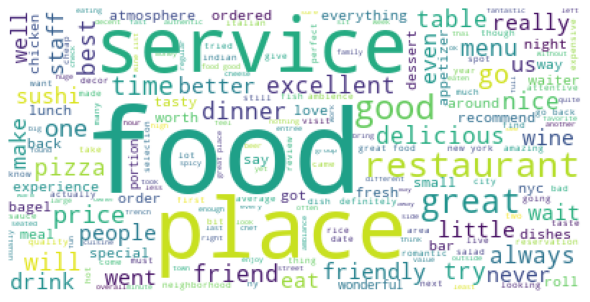

In [78]:
#Creating Word Cloud
from wordcloud import WordCloud
plt.figure(figsize = (8, 8))
text = str(complete_words )
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

### 3.8 Feature Extraction

### 1. Feature 1: aspect term

In [40]:
#Que: How many data points for aspect term are present?
restaurant_data['aspect_term'].value_counts()

food                                          170
service                                       119
place                                          47
prices                                         40
dinner                                         35
                                             ... 
Grilled Chicken special with Edamame Puree      1
AC                                              1
ala carte                                       1
noodle dishes                                   1
LOBSTER TAILS                                   1
Name: aspect_term, Length: 807, dtype: int64

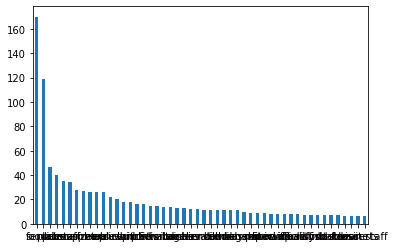

In [41]:
#grahical representation
restaurant_data['aspect_term'].value_counts()[:50].plot.bar(rot=0)

#observation :
             I observed that there are 807 unique values of aspect term from 3k dataset. Above is the barplot of 50 aspect term which shows higher values at starting the count is decreasing.
             

In [42]:
aspect_term = restaurant_data['aspect_term'].unique()
aspect_term[0:10]

array(['staff', 'food', 'menu', None, 'perks', 'dish', 'Bagels', 'songs',
       'omelet', 'check'], dtype=object)

### Feature 2 : Aspect Catagory

In [43]:
#Que: How many data points for aspect catagory are present?
restaurant_data['aspect_category'].value_counts()

anecdotes/miscellaneous    1040
food                        870
service                     466
ambience                    387
price                       281
Name: aspect_category, dtype: int64

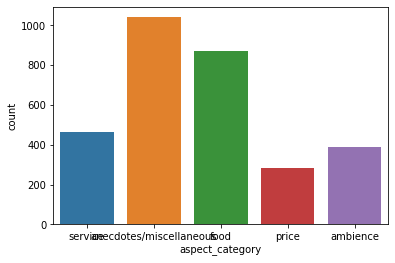

In [44]:
#grahical representation
sns.countplot(x='aspect_category', data = restaurant_data)

Observation : 
              Above is the counterplot of aspect catagory . There are 5 unique aspect category with the above showned counts. It sees that anecdotes/miscellaneous and food have higher count

In [71]:
# from aspect term , how they belong to aspect category
pd.crosstab([restaurant_data.aspect_term],  restaurant_data.aspect_category, margins=True)

aspect_category,ambience,anecdotes/miscellaneous,food,price,service,All
aspect_term,,,,,,
'gourmet' Indian cuisine,0,0,1,0,0,1
2-person table,0,0,0,0,1,1
AC,1,0,0,0,0,1
ACTORS,1,0,0,0,0,1
AT MOSHPHERE,1,0,0,0,0,1
...,...,...,...,...,...,...
wines,0,0,1,1,0,2
wines by the glass,0,0,1,0,0,1
zen feel,1,0,0,0,0,1


### Feature 3 : Polarity

In [7]:
#Que: How many data points for Polarity are present?
restaurant_data['polarity'].value_counts()

positive    1721
negative     702
neutral      448
conflict     173
Name: polarity, dtype: int64

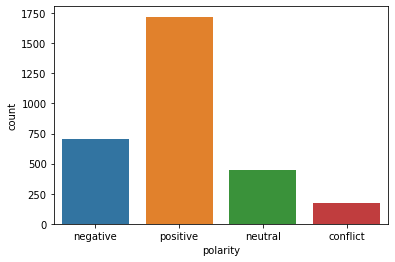

In [8]:
#grahical representation
sns.countplot(x='polarity', data = restaurant_data)

Observation :
    Above is the counter plot for polarity shwoing all counts for 4 unique polarities i.e. positive, negative, neutral, conflict from that we can see positive have higher values thhan remaining

### 3.9 calculation of polarity with respect to aspect category 

In [69]:
pd.crosstab([restaurant_data.aspect_category],  restaurant_data.polarity, margins=True)

polarity,conflict,negative,neutral,positive,All
aspect_category,,,,,
ambience,43,87,23,234,387
anecdotes/miscellaneous,27,178,333,502,1040
food,57,160,66,587,870
price,16,99,10,156,281
service,30,178,16,242,466
All,173,702,448,1721,3044


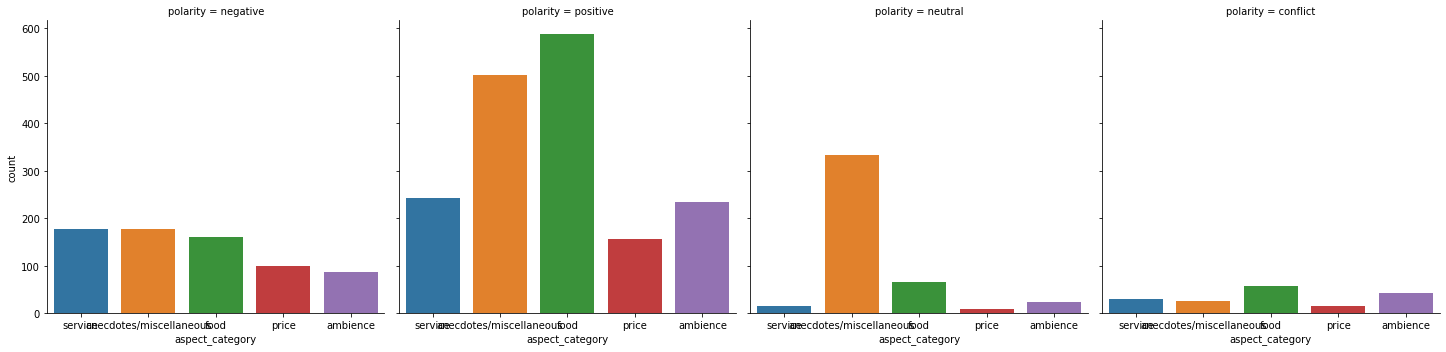

In [9]:
#grahical representation
sns.catplot(x='aspect_category', col='polarity', kind='count', data= restaurant_data)

Observation : This is the counterplot for every aspect category with respect to polarity showing the highest rated value for positive polarity and least values for conflict